1. Import libraries

In [1]:
%%capture
!pip install fbprophet
!pip install prophet
!pip install pystan==2.19.1.1 prophet
!pip install --upgrade plotly

In [2]:
%%capture
!pip install pmdarima

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly

2. Load datasets:

In [4]:
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_a.head()
#La columna datetime está como index

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [5]:
data_train_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2017-01-27 18:42:00 to 2017-01-28 01:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [6]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [7]:
data_train_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2017-01-27 18:42:00 to 2017-01-28 04:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     600 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


In [8]:
data_train_a.reset_index(inplace=True)
#Reseteamos index

In [9]:
data_train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


# **DATASET A**

3.1 Use Prophet to fit data

In [10]:
#Renombramos las cols datetime y cpu porque para usar prophet la fecha se tiene que llamar ds y la que queremos predecir y
data_train_a.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [12]:
m = Prophet()
m.fit(data_train_a)

17:28:42 - cmdstanpy - INFO - Chain [1] start processing
17:28:42 - cmdstanpy - INFO - Chain [1] done processing
17:28:42 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
17:28:42 - cmdstanpy - INFO - Chain [1] start processing
17:28:42 - cmdstanpy - INFO - Chain [1] done processing
17:28:42 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization: 

In [ ]:
future = m.make_future_dataframe(periods=1)
future.tail()
#Los próximos 4 eventos que van a ocurrir

,ds
416,2017-01-28 01:38:00
417,2017-01-28 01:39:00
418,2017-01-28 01:40:00
419,2017-01-28 01:41:00
420,2017-01-29 01:41:00


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
416,2017-01-28 01:38:00,2.034758,1.533537,2.547016
417,2017-01-28 01:39:00,2.043367,1.563264,2.586736
418,2017-01-28 01:40:00,2.051975,1.574482,2.570063
419,2017-01-28 01:41:00,2.060584,1.553926,2.567734
420,2017-01-29 01:41:00,14.456898,9.983741,18.953637


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/skohhyld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/rdq22pt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43133', 'data', 'file=/tmp/tmperz7ut1h/skohhyld.json', 'init=/tmp/tmperz7ut1h/rdq22pt0.json', 'output', 'file=/tmp/tmpv97e38lw/prophet_model-20220812213341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:33:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:33:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


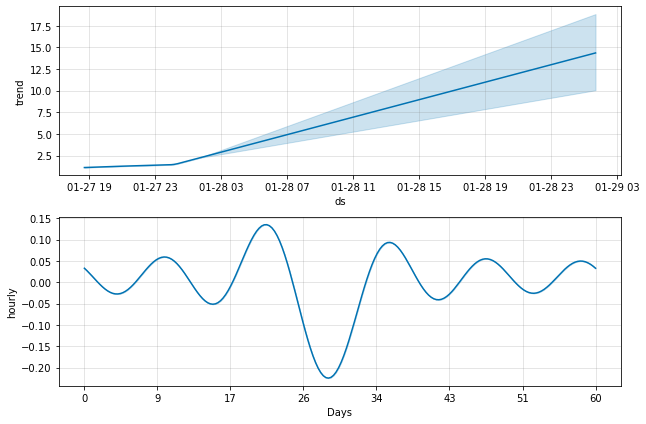

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m.fit(data_train_a).predict(future)
fig = m.plot_components(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/47h2fxqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/0dvbndni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40896', 'data', 'file=/tmp/tmperz7ut1h/47h2fxqb.json', 'init=/tmp/tmperz7ut1h/0dvbndni.json', 'output', 'file=/tmp/tmpf6n3yqe4/prophet_model-20220812214529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:45:29 - cmdstanpy - INFO - Chain [1] done processing
IN

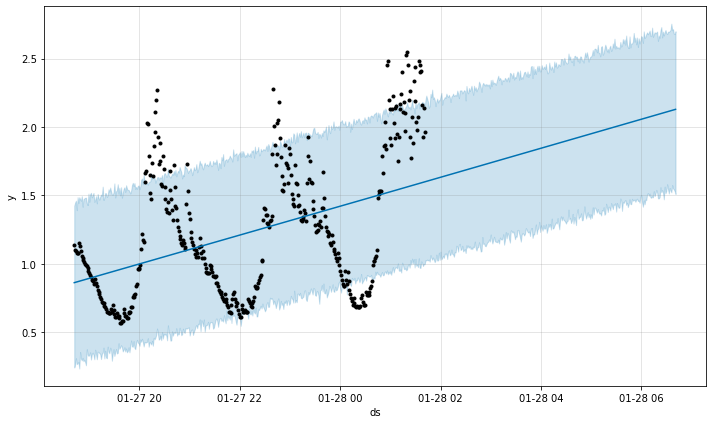

In [ ]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_a)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:
#Parámetros por default que pasó Camila
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
m.fit(data_train_a)

DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/fv76b_m9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/rqun21a6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89152', 'data', 'file=/tmp/tmperz7ut1h/fv76b_m9.json', 'init=/tmp/tmperz7ut1h/rqun21a6.json', 'output', 'file=/tmp/tmpi8izs8qn/prophet_model-20220812215654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:56:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:56:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


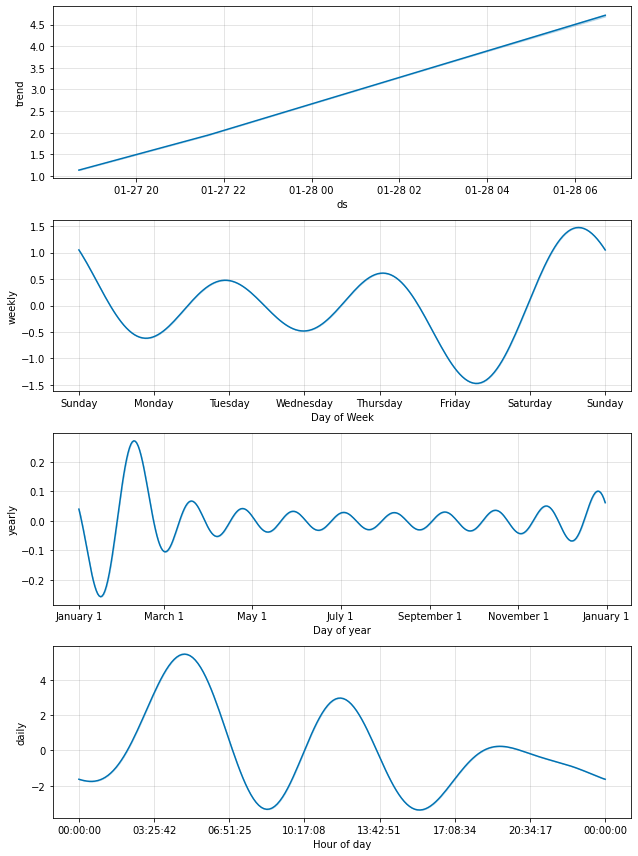

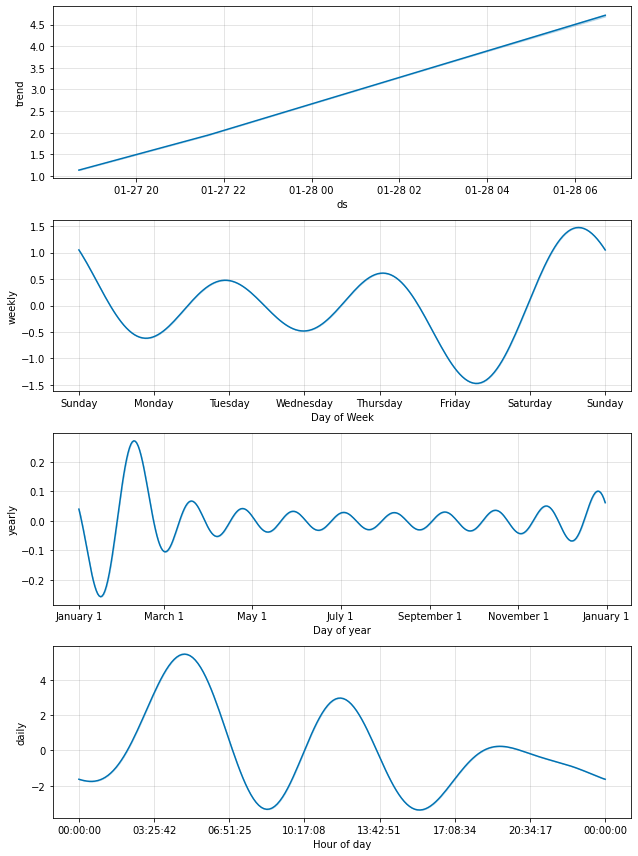

In [ ]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True).fit(data_train_a)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
m.plot_components(fcst)

In [ ]:
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
m.plot_components(fcst)

3.1 Use ARIMA to fit data

In [ ]:
#Corremos la serie de nuevo porque la tenemos seteada para prophet y convertimos index en datetime
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_a.index = pd.to_datetime(data_train_a.index)
data_train_b.index = pd.to_datetime(data_train_b.index)

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.83 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=2.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.41 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=0.97 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.49 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.99 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=1.02 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=2.11 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.3

In [ ]:
stepwise_model.fit(data_train_a)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

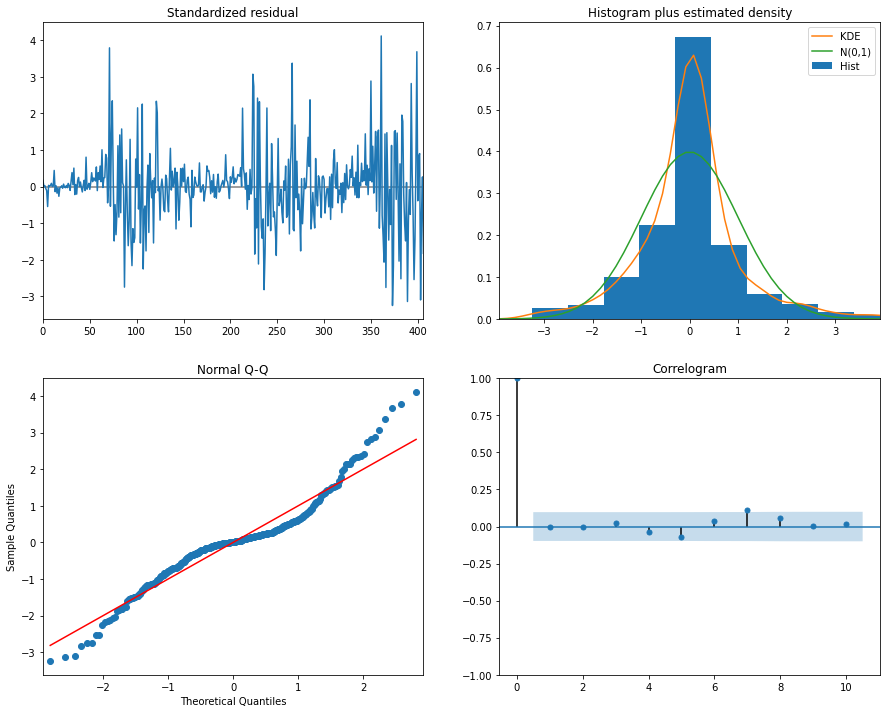

In [ ]:
stepwise_model.fit(data_train_a).plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
future_forecast = stepwise_model.predict(n_periods=60)

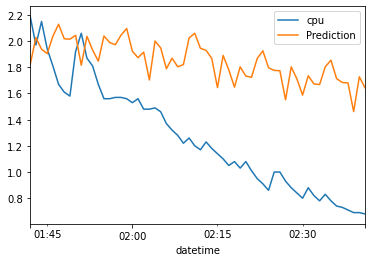

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_a.index,columns=['Prediction'])
pd.concat([data_test_a,future_forecast],axis=1).plot()

# **DATASET B**

3.1 Use Prophet to fit data

In [ ]:
data_train_b.reset_index(inplace = True)

In [ ]:
data_train_b.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [ ]:
n = Prophet()
n.fit(data_train_b)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/ptjlsc1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/lph8iws4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63664', 'data', 'file=/tmp/tmperz7ut1h/ptjlsc1h.json', 'init=/tmp/tmperz7ut1h/lph8iws4.json', 'output', 'file=/tmp/tmp2d5p5fw7/prophet_model-20220812222953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:29:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:29:53 - cmdstanpy - INFO - Chain [1] done processing
IN

In [ ]:
forecast = n.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
715,2017-01-28 06:37:00,1.724346,1.175329,2.278256
716,2017-01-28 06:38:00,1.725394,1.126509,2.301288
717,2017-01-28 06:39:00,1.726443,1.180368,2.275286
718,2017-01-28 06:40:00,1.727491,1.131879,2.273293
719,2017-01-28 06:41:00,1.728539,1.166750,2.327946


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/kgrv__3v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/14vjbe3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6622', 'data', 'file=/tmp/tmperz7ut1h/kgrv__3v.json', 'init=/tmp/tmperz7ut1h/14vjbe3s.json', 'output', 'file=/tmp/tmpo1fuiy22/prophet_model-20220812223042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:30:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:30:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


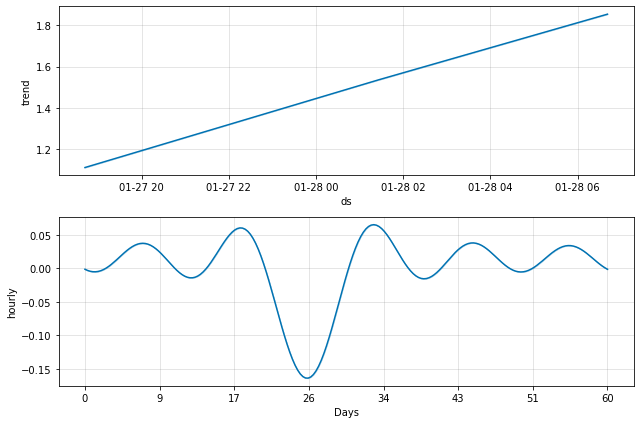

In [ ]:
n = Prophet(weekly_seasonality=False)
n.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = n.fit(data_train_b).predict(future)
fig = n.plot_components(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/5whslub9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmperz7ut1h/wk61n86n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90178', 'data', 'file=/tmp/tmperz7ut1h/5whslub9.json', 'init=/tmp/tmperz7ut1h/wk61n86n.json', 'output', 'file=/tmp/tmpb6fx1ovg/prophet_model-20220812223122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:31:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:31:22 - cmdstanpy - INFO - Chain [1] done processing
IN

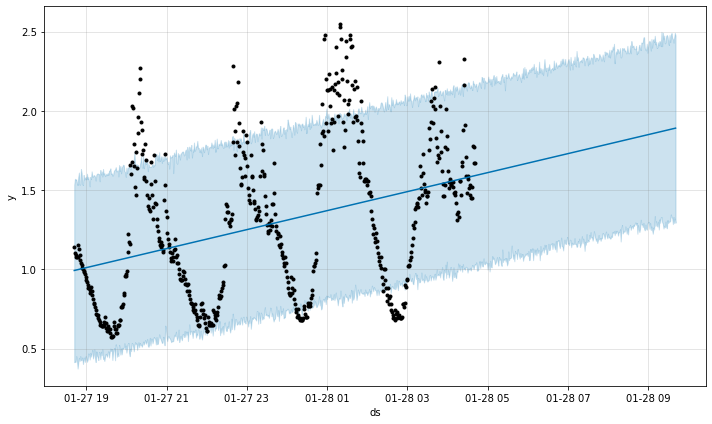

In [ ]:
n = Prophet(changepoint_prior_scale=0.01).fit(data_train_b)
future = n.make_future_dataframe(periods=300, freq='1min')
fcst = n.predict(future)
fig = n.plot(fcst)

In [ ]:
n = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True).fit(data_train_b)
future = n.make_future_dataframe(periods=300, freq='1min')
fcst = n.predict(future)
fig = n.plot(fcst)

In [ ]:
future = n.make_future_dataframe(periods=300, freq='1min')
fcst = n.predict(future)
n.plot_components(fcst)

3.1 Use ARIMA to fit data

In [ ]:
#Load dataset again
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b.index = pd.to_datetime(data_test_b.index)
data_train_b.index = pd.to_datetime(data_train_b.index)

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model_b = auto_arima(data_train_b, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_b.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-376.973, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-540.238, Time=0.50 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-375.034, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-618.341, Time=1.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-619.706, Time=1.29 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-541.973, Time=0.35 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.22 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.20 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-618.493, Time=1.41 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=7.03 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-617.729, T

In [ ]:
stepwise_model_b.fit(data_train_b)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

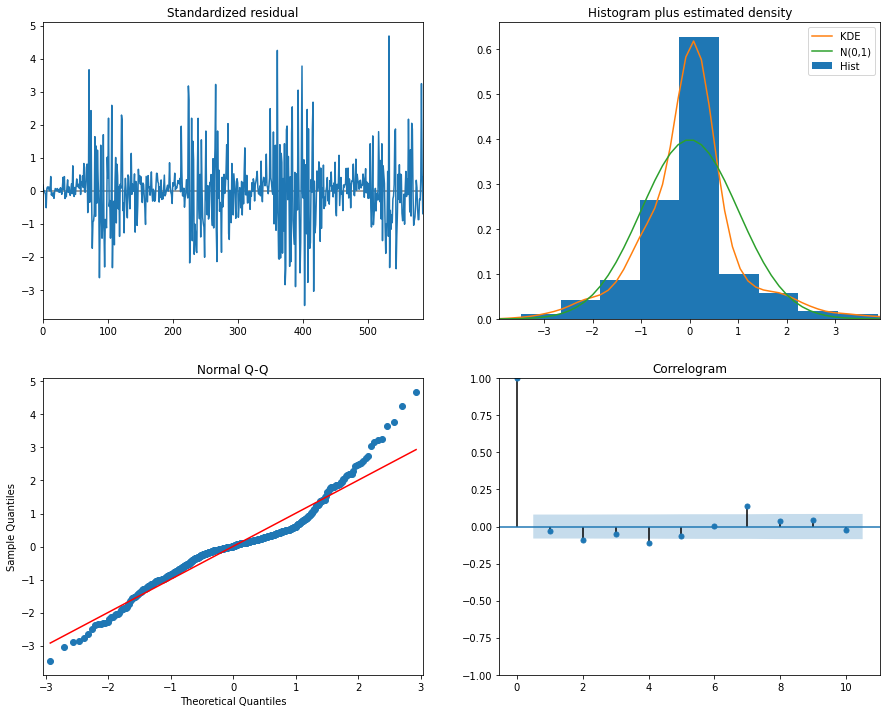

In [ ]:
stepwise_model_b.fit(data_train_b).plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
future_forecast = stepwise_model_b.predict(n_periods=60)

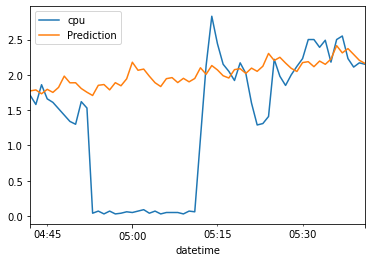

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_b.index,columns=['Prediction'])
pd.concat([data_test_b,future_forecast],axis=1).plot()

In [ ]:
#Save model
import pickle
filename = '../models/stepwise_model.pkl'
pickle.dump(stepwise_model, open('../models/stepwise_model.pkl', 'wb'))